## Data Modeling
Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

# Contents
1. Load the dataset
2. Baseline model
3. Model Iterations

## 1.Loading Dataset

In [7]:
%load_ext autoreload
%autoreload 2
from tensorflow.keras.regularizers import l1, l2
from my_modules.model_evaluator import modeler
from tensorflow.keras import models, layers, metrics, callbacks, regularizers
from my_modules.import_datasets import create_dataset, process_dataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from my_modules.import_datasets import create_dataset, process_dataset

train_dir = "data/chest_xray/new_train"
val_dir = "data/chest_xray/new_val"
test_dir = "data/chest_xray/new_test"

train_ds = process_dataset(create_dataset(train_dir))
val_ds = process_dataset(create_dataset(val_dir))
test_ds = process_dataset(create_dataset(test_dir))

for inputs, labels in train_ds.take(1):
        input_shape = inputs.shape[1:]
        break


Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 587 files belonging to 2 classes.


For metrics, I chose accuracy to show overall performance of the model, Recall to emphasise the importance of minimizing false negatives, and AUC. 

## Baseline Model

In [1]:
from my_modules.model_evaluator import modeler
from tensorflow.keras import models, layers, metrics, callbacks, regularizers
from tensorflow.keras.regularizers import l1, l2

early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=10, 
                               mode='min', 
                               restore_best_weights=True,
                               verbose=1)

2024-03-04 17:38:44.274688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training time: 15.302791357040405 seconds



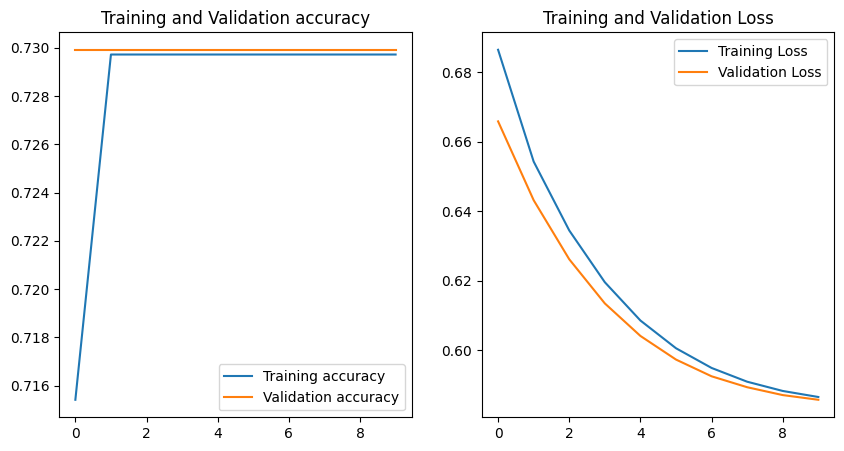

,loss,auc,recall,accuracy
Train,0.585811,0.5,1.0,0.729718
Val,0.585646,0.5,1.0,0.729915
Diff,-0.000165,0.0,0.0,0.000196


------------------------------



In [4]:
#baseline
baseline_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(10, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

baseline_results, baseline_model = modeler(
    baseline_model, file_name= 'baseline', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=10)


Training time: 33.695170640945435 seconds



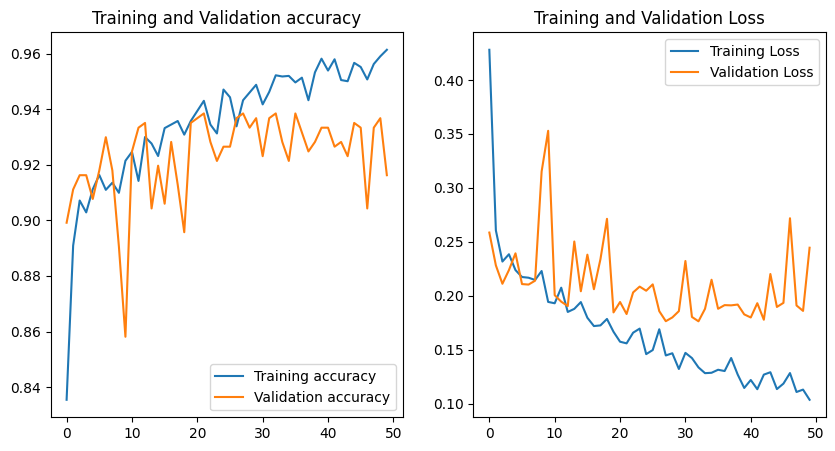

,loss,auc,recall,accuracy
Train,0.123548,0.992807,0.995026,0.948762
Val,0.244597,0.961647,0.983607,0.916239
Diff,0.121049,-0.031160,-0.011420,-0.032522


------------------------------



In [7]:
#model_2: 1 layer dense with 128 nodes
model_2 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_2, model_2 = modeler(
    model_2, file_name= 'model_2', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Training time: 37.446272134780884 seconds



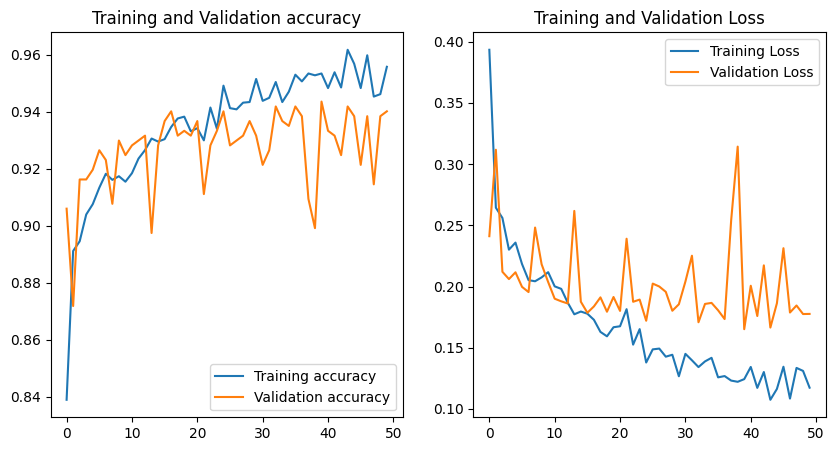

,loss,auc,recall,accuracy
Train,0.096341,0.992726,0.968110,0.964133
Val,0.177614,0.975454,0.960187,0.940171
Diff,0.081273,-0.017272,-0.007923,-0.023962


------------------------------



In [8]:
#model_3: - 2 layer dense with 128, 64 nodes

model_3 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_3, model_3 = modeler(
    model_3, file_name= 'model_3', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Training time: 39.49663543701172 seconds



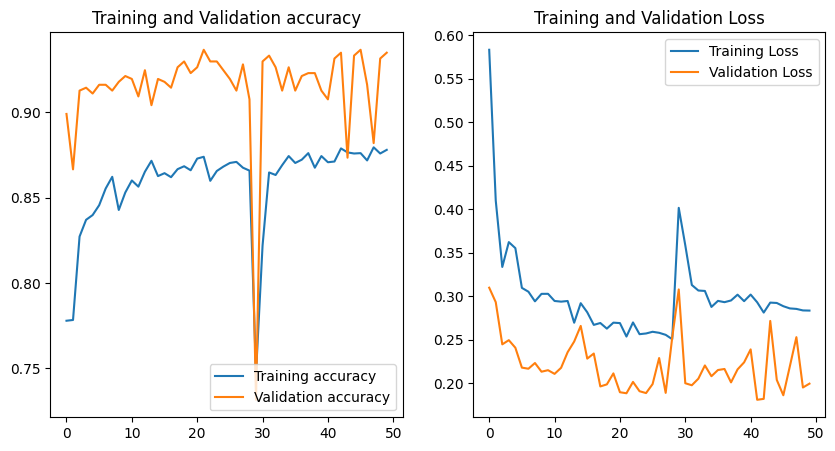

,loss,auc,recall,accuracy
Train,0.175088,0.984239,0.971036,0.950043
Val,0.199552,0.971571,0.971897,0.935043
Diff,0.024465,-0.012668,0.000861,-0.015000


------------------------------



In [9]:
#model_4: 2 layer dense with 128, 64 nodes with 0.3 dropout

model_4 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')])

results_4, model_4 = modeler(
    model_4, file_name= 'model_4', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Restoring model weights from the end of the best epoch: 22.
Epoch 32: early stopping
Training time: 41.00668525695801 seconds



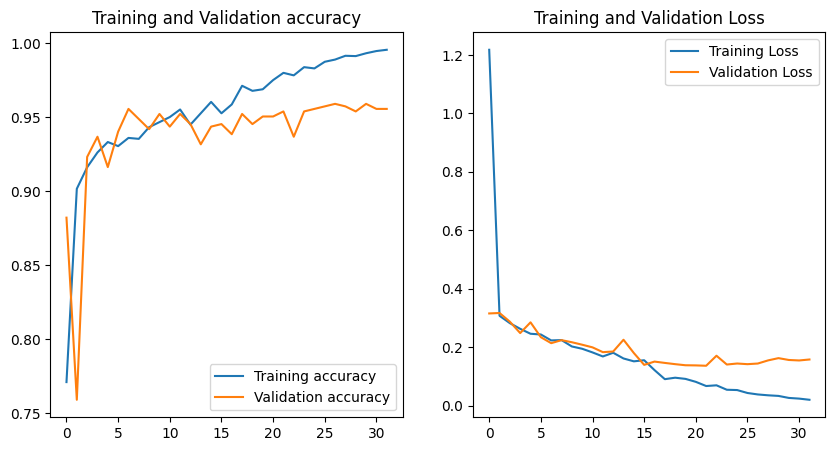

,loss,auc,recall,accuracy
Train,0.056999,0.997834,0.985079,0.985269
Val,0.136724,0.985533,0.967213,0.953846
Diff,0.079724,-0.012300,-0.017866,-0.031423


------------------------------



In [13]:
#model_5: Conv Network

model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_5, model_5 = modeler(
    model_5, file_name = 'model_5', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Training time: 61.338308572769165 seconds



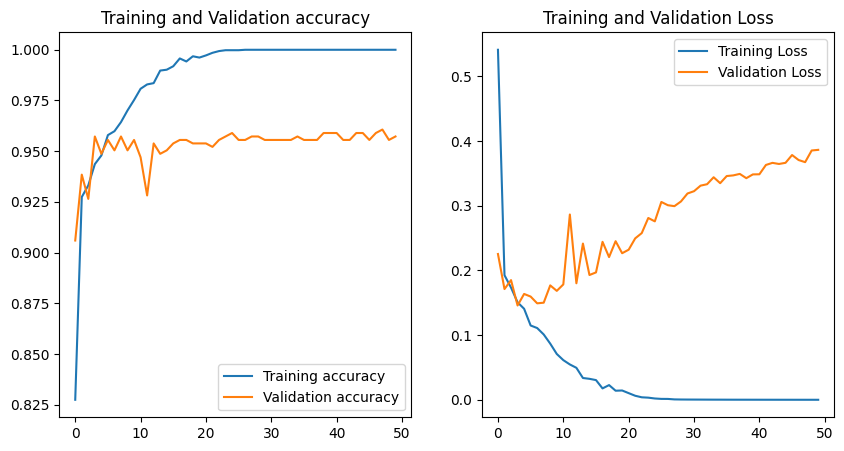

,loss,auc,recall,accuracy
Train,0.000042,1.000000,1.000000,1.000000
Val,0.386415,0.955874,0.978923,0.957265
Diff,0.386373,-0.044126,-0.021077,-0.042735


------------------------------



In [15]:
#model_6: Conv 2 layer, 32, 64

model_6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_6, model_6 = modeler(
    model_6, file_name = 'model_6', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping
Training time: 26.18057346343994 seconds



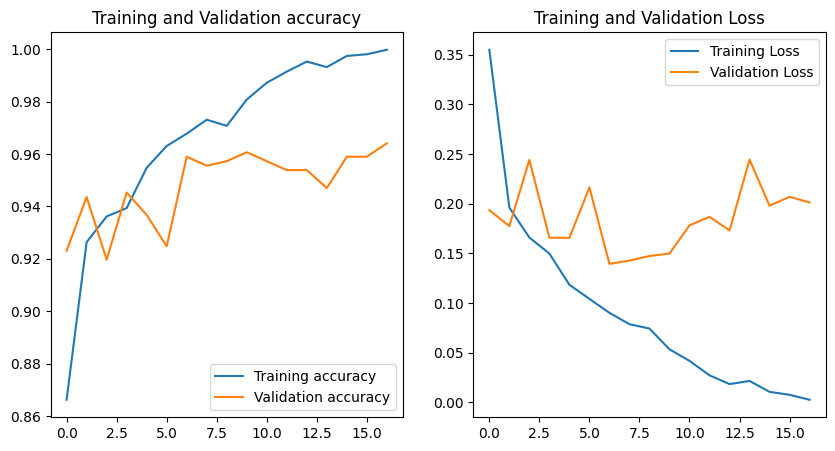

,loss,auc,recall,accuracy
Train,0.066039,0.994436,0.988297,0.978864
Val,0.139514,0.979575,0.974239,0.958974
Diff,0.073475,-0.014861,-0.014058,-0.019890


------------------------------



In [16]:
#model_7: Conv 3 layer, 32, 64, 128
model_7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_7, model_7 = modeler(
    model_7, file_name = 'model_7', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping
Training time: 47.71717166900635 seconds



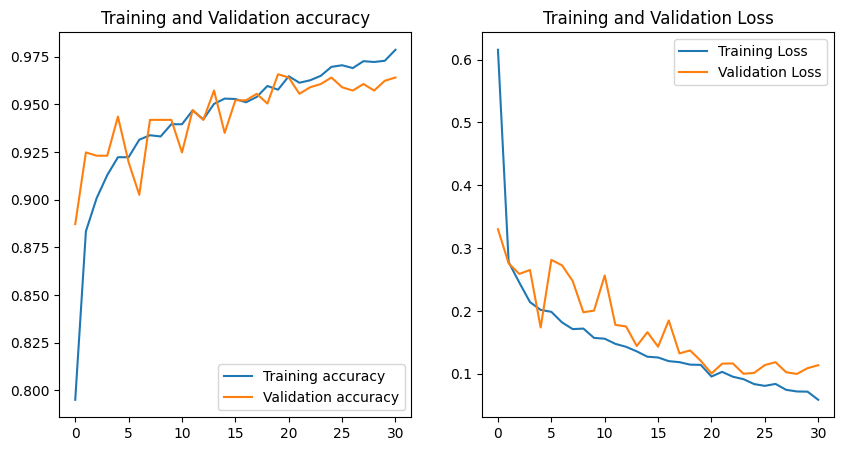

,loss,auc,recall,accuracy
Train,0.076928,0.996337,0.984201,0.975875
Val,0.100584,0.991603,0.978923,0.964103
Diff,0.023656,-0.004734,-0.005279,-0.011773


------------------------------



In [17]:
#model_8: model_7 0.25 Dropout after max

model_8 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_8, model_8 = modeler(
    model_8, file_name = 'model_8', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

In [ ]:
#model_81: model_7 0.5 Dropout after max

model_81 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_81, model_81 = modeler(
    model_81, file_name = 'model_81', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

Training time: 90.97121095657349 seconds



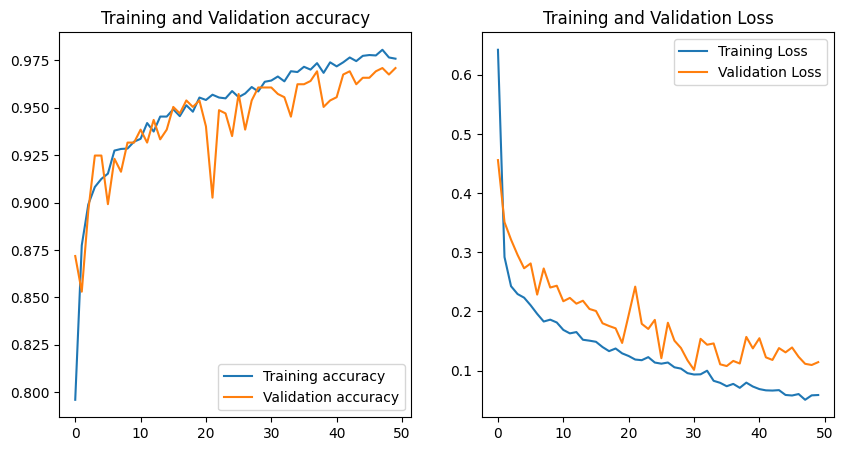

,loss,auc,recall,accuracy
Train,0.027786,0.999892,0.997074,0.994876
Val,0.114255,0.986341,0.981265,0.970940
Diff,0.086469,-0.013550,-0.015810,-0.023936


------------------------------



In [6]:
#model_82: model_7 0.25 Dropout after Dense

model_82 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_82, model_82 = modeler(
    model_82, file_name = 'model_82', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

In [ ]:
#model_83: model_7 0.5 Dropout after Dense

model_83 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
results_83, model_83 = modeler(
    model_83, file_name = 'model_83', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

In [ ]:
#model_84: model_7 0.25 Dropout after max & dense

model_84 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_84, model_84 = modeler(
    model_84, file_name = 'model_84', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

In [ ]:
#model_85: model_7 0.5 Dropout after max & dense

model_85 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
results_85, model_85 = modeler(
    model_85, file_name = 'model_85', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

Restoring model weights from the end of the best epoch: 35.
Epoch 45: early stopping
Training time: 83.1772232055664 seconds



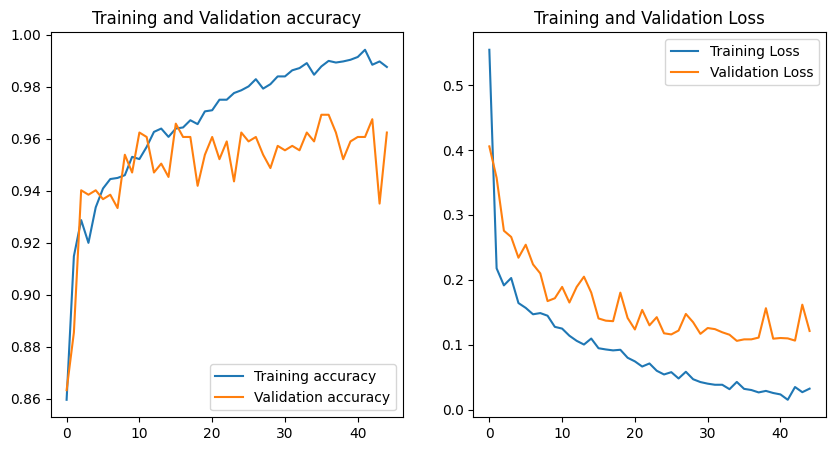

,loss,auc,recall,accuracy
Train,0.048896,0.999758,0.994734,0.994449
Val,0.105935,0.991166,0.967213,0.958974
Diff,0.057040,-0.008593,-0.027521,-0.035475


------------------------------



In [18]:
#model_9: Conv 0.25 Dropout after Conv

model_9 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_9, model_9 = modeler(
    model_9, file_name = 'model_9', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Training time: 74.45340085029602 seconds



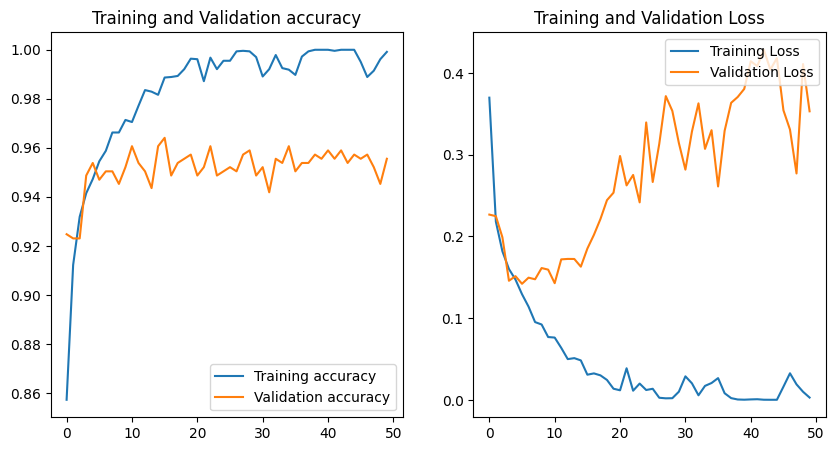

,loss,auc,recall,accuracy
Train,0.001931,1.000000,1.000000,0.999573
Val,0.353129,0.963537,0.976581,0.955556
Diff,0.351198,-0.036462,-0.023419,-0.044017


------------------------------



In [22]:
#model_10:Conv 0.3 Dropout after Dense

model_10 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
results_10, model_10 = modeler(
    model_10, file_name = 'model_10', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

Restoring model weights from the end of the best epoch: 29.
Epoch 39: early stopping
Training time: 72.24512505531311 seconds



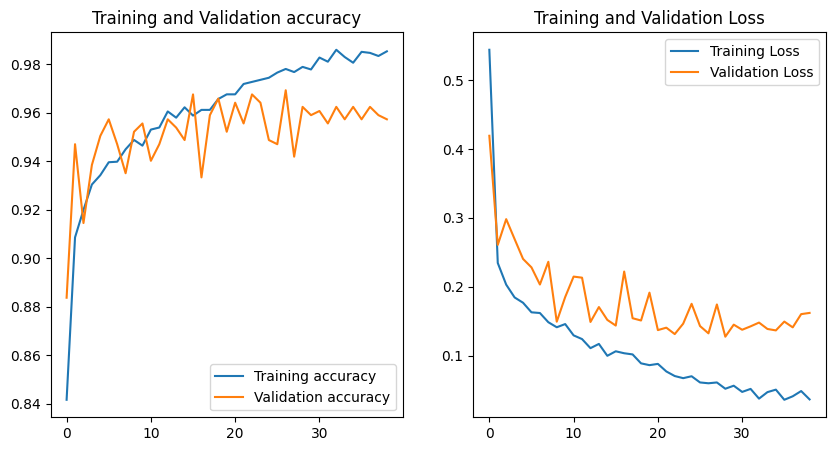

,loss,auc,recall,accuracy
Train,0.050138,0.999613,0.995026,0.992101
Val,0.127370,0.984474,0.974239,0.962393
Diff,0.077232,-0.015139,-0.020787,-0.029708


------------------------------



In [23]:
#model_11: Conv 0.3 Dropout after Conv & Dense

model_11 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
results_11, model_11 = modeler(
    model_11, file_name = 'model_11', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Training time: 74.1574194431305 seconds



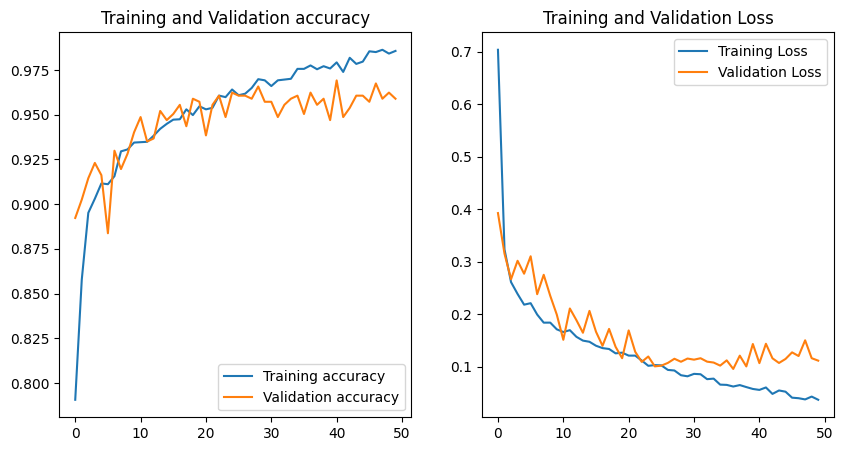

,loss,auc,recall,accuracy
Train,0.020859,0.999895,0.996197,0.995090
Val,0.111917,0.991759,0.962529,0.958974
Diff,0.091058,-0.008136,-0.033667,-0.036115


------------------------------



In [8]:
#model_8.2: Conv 0.3 Dropout after Max
model_8_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_8_2, model_8_2 = modeler(
    model_8_2, file_name = 'model_8_2', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

Training time: 83.74972701072693 seconds



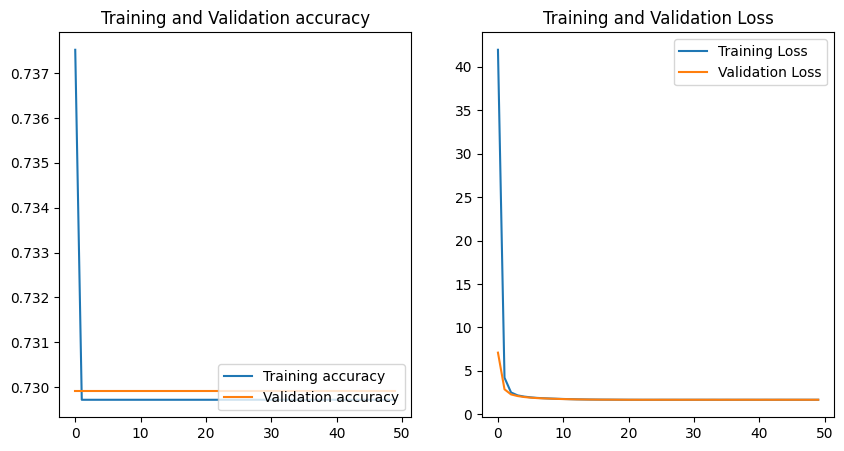

,loss,auc,recall,accuracy
Train,1.662856,0.5,1.0,0.729718
Val,1.662672,0.5,1.0,0.729915
Diff,-0.000184,0.0,0.0,0.000196


------------------------------



In [9]:
#model_8.3: Conv L1, 0.3 Dropout after Max
model_8_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape, kernel_regularizer=l1(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01)),
    layers.Dense(1, activation='sigmoid')
])
results_8_3, model_8_3 = modeler(
    model_8_3, file_name = 'model_8_3', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

Training time: 83.28261351585388 seconds



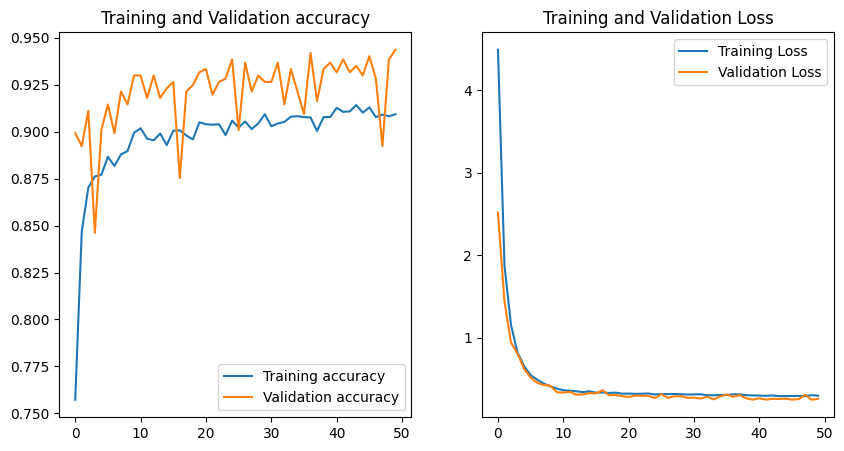

,loss,auc,recall,accuracy
Train,0.278242,0.971393,0.947923,0.929547
Val,0.261728,0.977025,0.967213,0.943590
Diff,-0.016514,0.005632,0.019290,0.014042


------------------------------



In [10]:
#model_8.4: Conv L2, 0.3 Dropout after Max

model_8_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape, kernel_regularizer='l2'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer='l2'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer='l2'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid')
])
results_8_4, model_8_4 = modeler(
    model_8_4, file_name = 'model_8_4', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

In [ ]:
model_11 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
results_11, model_11 = modeler(
    model_11, file_name = 'model_11', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
# play with drop out numbers

In [ ]:
#SGD

In [ ]:
#RMSProp

In [ ]:
#No initializer

In [ ]:
#Lecun initializer

In [ ]:
# 2 dense layers

In [ ]:
# change kernel size